In [241]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering


%matplotlib inline
plt.style.use('ggplot')

# open saved object
with open ('song_data.p', 'rb') as fp:
    df_song_data = pickle.load(fp)
    
with open ('song_df.p', 'rb') as fp:
    song_df = pickle.load(fp)

In [242]:
df_song_data.set_index(df_song_data['song_id'], inplace=True)
df_song_data.pop('song_id')
df_song_data = df_song_data[~df_song_data.index.duplicated(keep='first')]

In [243]:
song_df.set_index(song_df['song_id'], inplace=True)
song_df.pop('song_id')
song_df = song_df [~song_df .index.duplicated(keep='first')]

In [244]:
data = pd.merge(song_df, df_song_data, left_index=True, right_index=True, how='inner')
data = data[~data.index.duplicated(keep='first')]

In [245]:
keys = pd.get_dummies(df_song_data['key'], prefix='key')
keys = keys.mul((1/12.), axis=0)

In [220]:
song_id = df_song_data.index
X = df_song_data.drop(['time_sig'], axis=1).values
X = preprocessing.scale(X)
X = np.concatenate((X, keys.values), axis=1)

cluster_model = AgglomerativeClustering(n_clusters=10, affinity="cosine", linkage = "complete")
cluster_model.fit(X)

pred = cluster_model.fit_predict(X)

In [221]:
tempo_rng = (0, 200)
duration_rng = (100, 650)
dyn_range_rng = (0, 60)
loud_rng = (-14,0)

def plot_hist(feature, rng):  
    fig, axes = plt.subplots(2,5, figsize=(15,10))

    for i, ax in enumerate(axes.flatten()):
        if i<10:
            song = song_id[np.where(pred==i)]
            variable = df_song_data[df_song_data.index.isin(song)][feature].values
            ax.hist(variable, bins=30, range= rng, normed=True)

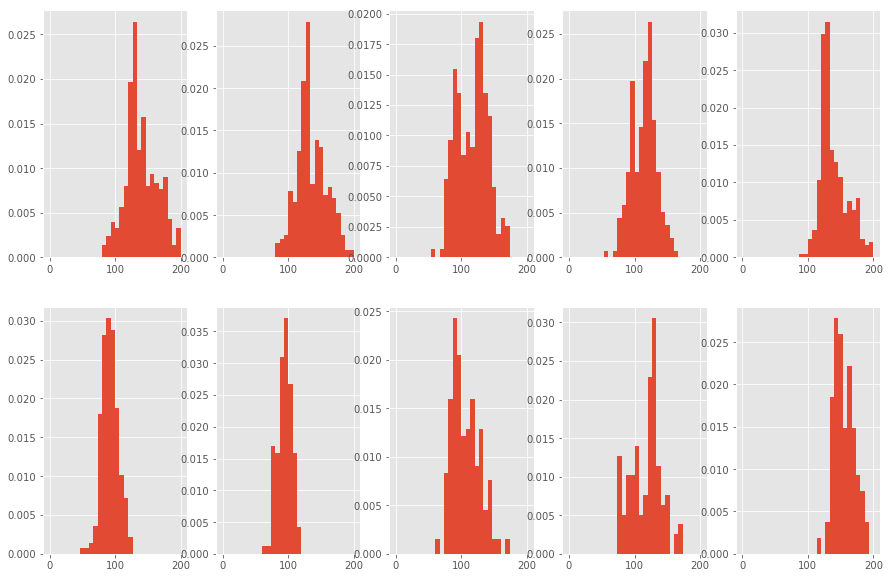

In [222]:
plot_hist('tempo', tempo_rng)

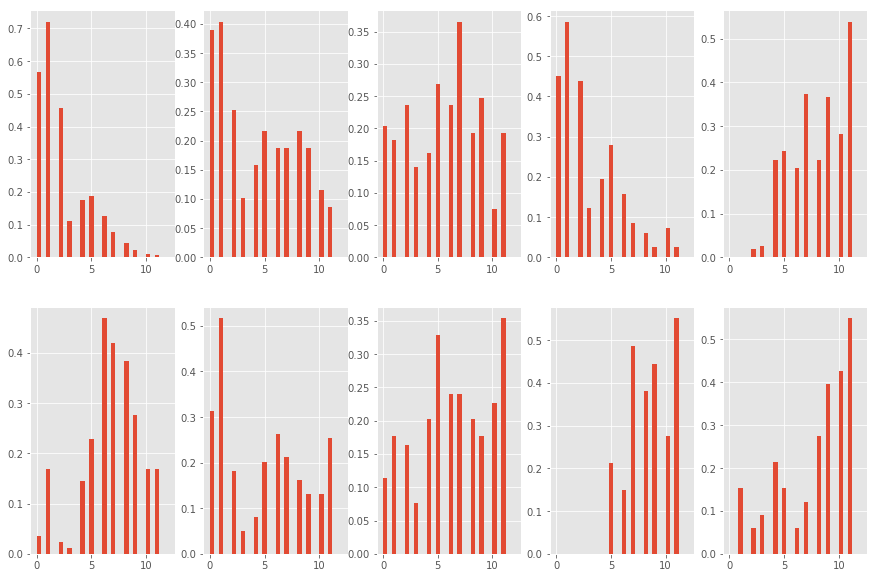

In [223]:
plot_hist('key', (0,12))

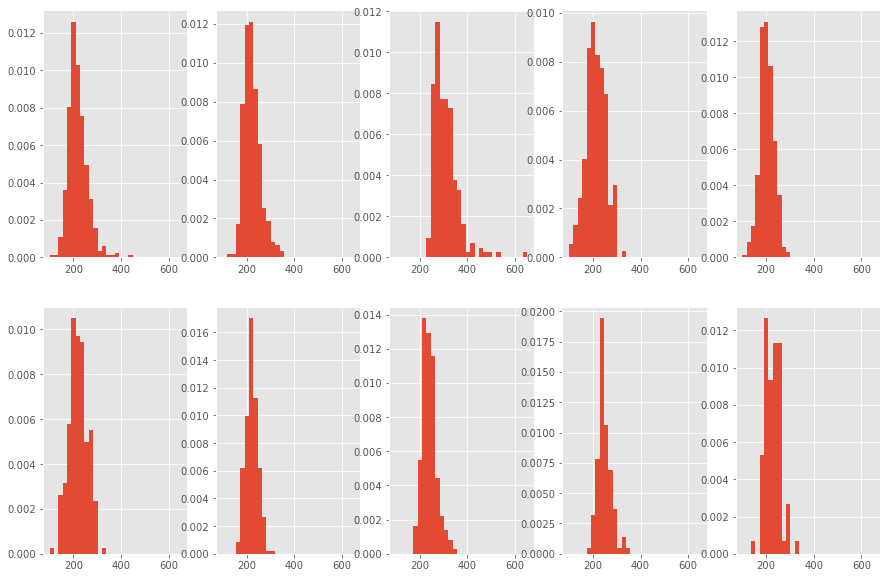

In [224]:
plot_hist('duration', duration_rng)

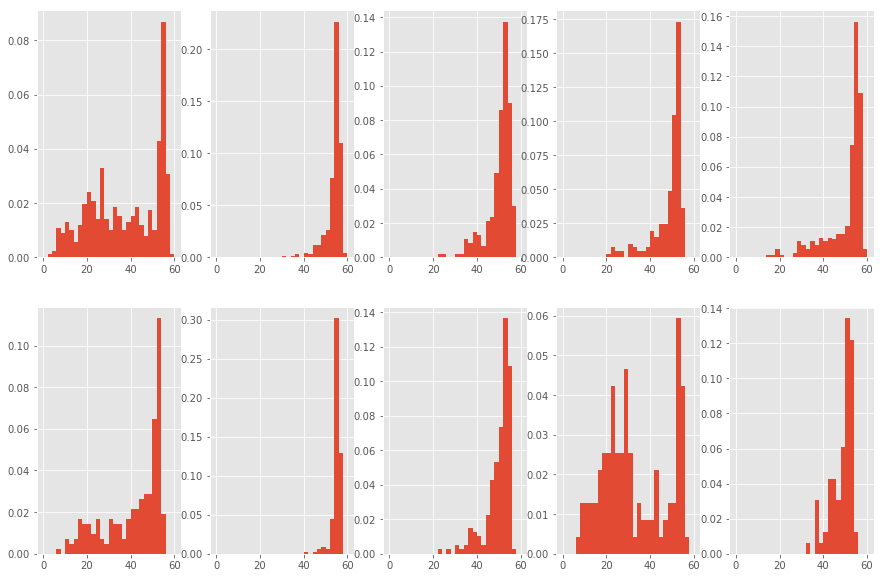

In [225]:
plot_hist('dyn_range', dyn_range_rng)

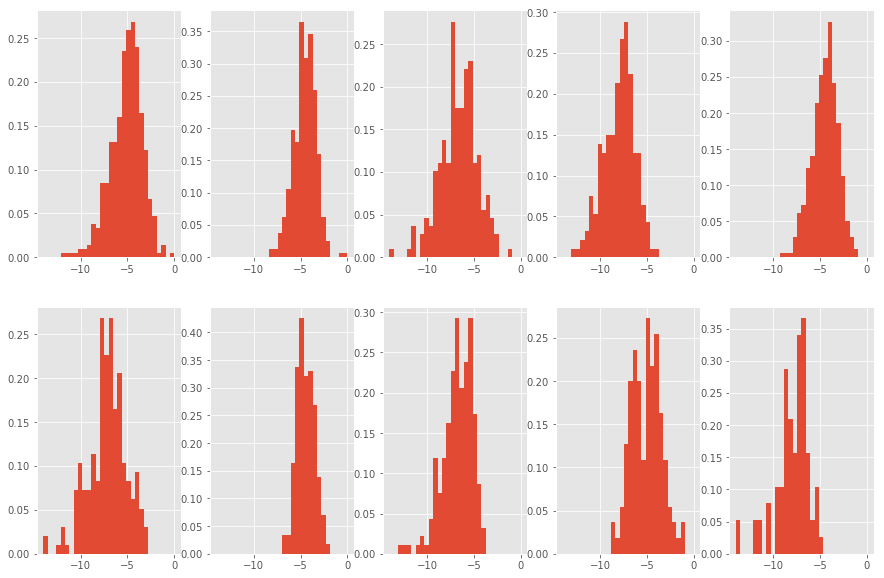

In [226]:
plot_hist('loudness', loud_rng)

In [49]:
df, pl = data.drop(data.tail(10).index), data.tail(10)
pl_data = data_as_array(pl)
df_data = data_as_array(df)
eu_dist = np.sqrt(((pl_data - df_data[:, np.newaxis, :])**2).sum(axis=2))
suggestions = df.iloc[np.argmin(eu_dist, axis=0)].sort_values('tempo', ascending=False)
# np.argmin(eu_dist, axis=0)

### Test Recommender Class


In [13]:
import pickle
with open ('../data/complete_data.p', 'rb') as fp:
    data = pickle.load(fp)

In [21]:
import pickle
with open ('../data/complete_data_py2.p', 'wb') as fp:
    pickle.dump(data, fp, protocol=2)

In [14]:
import sys
sys.path.append("../src")
from recommender import Recommend


In [15]:
recommender = Recommend(data)

In [20]:
recommender.df_dist_mat

array([[ 0.        ,  0.22966242,  0.21763921, ...,  0.18852243,
         0.51265456,  0.32117905],
       [ 0.22966242,  0.        ,  0.17994347, ...,  0.29365911,
         0.51308982,  0.38196185],
       [ 0.21763921,  0.17994347,  0.        , ...,  0.26904519,
         0.38854374,  0.27615367],
       ..., 
       [ 0.18852243,  0.29365911,  0.26904519, ...,  0.        ,
         0.39933455,  0.19191239],
       [ 0.51265456,  0.51308982,  0.38854374, ...,  0.39933455,
         0.        ,  0.21430622],
       [ 0.32117905,  0.38196185,  0.27615367, ...,  0.19191239,
         0.21430622,  0.        ]])

In [28]:
data.index[data['id']=='5L95vS64rG1YMIFm1hLjyZ'][0]

1

In [33]:
test = data[data['id']=='5L95vS64rG1YMIFm1hLjyZ'].to_dict()

In [35]:
import pandas as pd

pd.DataFrame(test)

,acousticness,analysis_url,artist,artist_id,danceability,duration_ms,energy,id,instrumentalness,key,...,mode,song,song_id,speechiness,tempo,time_signature,track_href,type,uri,valence
1,0.00205,https://api.spotify.com/v1/audio-analysis/5L95...,Bleachers,2eam0iDomRHGBypaDQLwWI,0.421,188867,0.79,5L95vS64rG1YMIFm1hLjyZ,0.000309,10,...,1,Rollercoaster,5L95vS64rG1YMIFm1hLjyZ,0.0538,162.024,4.0,https://api.spotify.com/v1/tracks/5L95vS64rG1Y...,audio_features,spotify:track:5L95vS64rG1YMIFm1hLjyZ,0.275
